# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import random
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Your API key

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Run an API request for each of the cities
    response = requests.get(city_url)

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Increment record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Run an API request for each city

        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = requests.get(city_url).json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | la passe
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | jalqani
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rio grande
Processing Record 8 of Set 1 | nar'yan-mar
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | comendador
Processing Record 15 of Set 1 | taltal
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | uniao da vitoria
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | moree
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | sao joao da barra
Processing Record 23 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la passe,45.5549,-0.8967,284.25,88,90,5.17,FR,1714014470
1,klyuchi,52.2667,79.1667,275.43,45,3,4.88,RU,1714014265
2,albany,42.6001,-73.9662,277.07,74,3,0.45,US,1714013712
3,jalqani,12.4486,34.2186,302.81,11,53,3.34,SD,1714014471
4,wailua homesteads,22.0669,-159.3780,299.39,82,100,8.75,US,1714014422


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,284.25,88,90,5.17,FR,1714014470
1,klyuchi,52.2667,79.1667,275.43,45,3,4.88,RU,1714014265
2,albany,42.6001,-73.9662,277.07,74,3,0.45,US,1714013712
3,jalqani,12.4486,34.2186,302.81,11,53,3.34,SD,1714014471
4,wailua homesteads,22.0669,-159.3780,299.39,82,100,8.75,US,1714014422


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

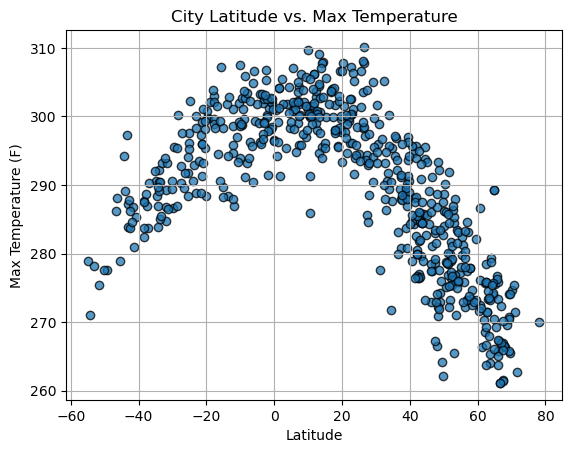

In [9]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


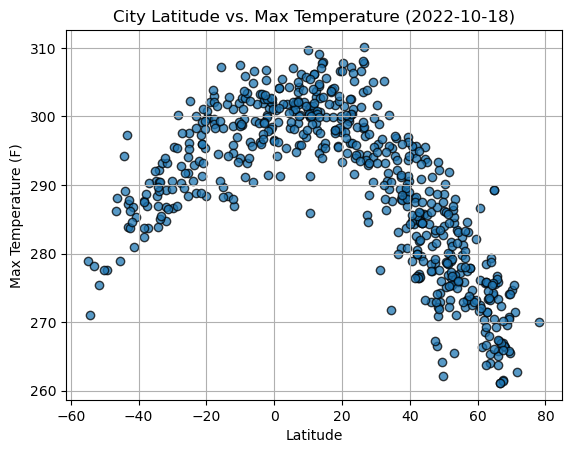

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

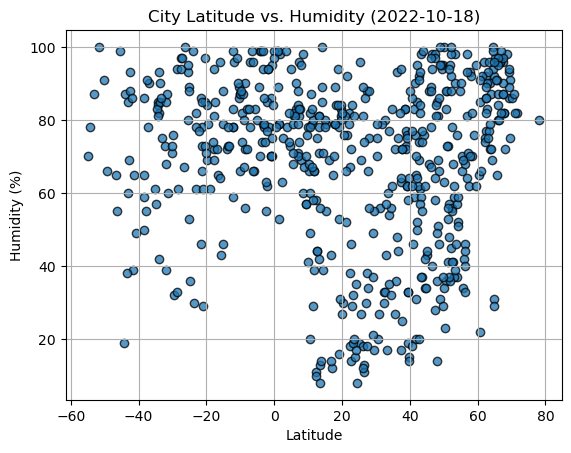

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

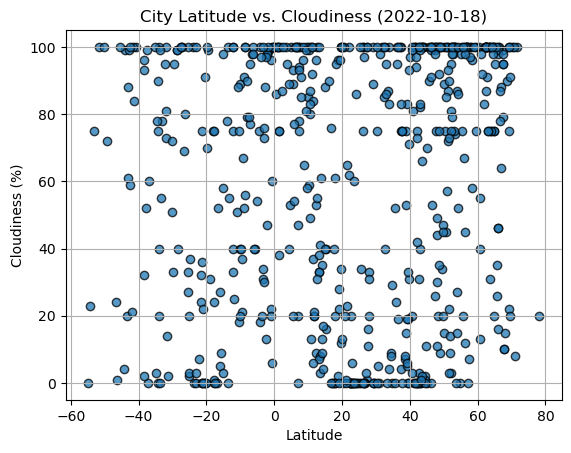

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

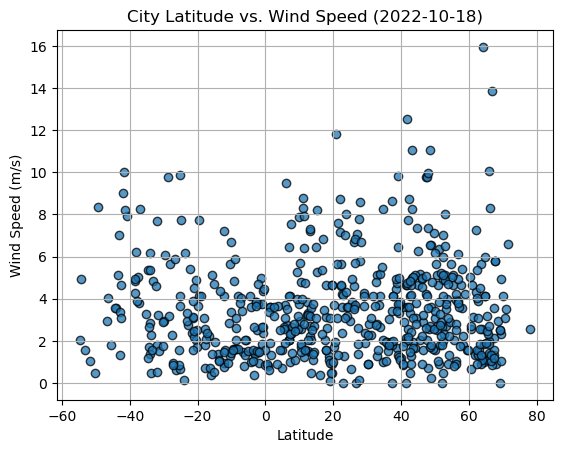

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,284.25,88,90,5.17,FR,1714014470
1,klyuchi,52.2667,79.1667,275.43,45,3,4.88,RU,1714014265
2,albany,42.6001,-73.9662,277.07,74,3,0.45,US,1714013712
3,jalqani,12.4486,34.2186,302.81,11,53,3.34,SD,1714014471
4,wailua homesteads,22.0669,-159.3780,299.39,82,100,8.75,US,1714014422


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,ushuaia,-54.8000,-68.3000,278.96,70,0,2.06,AR,1714014435
6,rio grande,-32.0350,-52.0986,284.79,68,100,1.78,BR,1714014249
9,port lincoln,-34.7333,135.8667,290.65,57,3,5.37,AU,1714014391
12,west island,-12.1568,96.8225,301.14,83,75,7.20,CC,1714014424
14,taltal,-25.4000,-70.4833,291.71,80,33,1.54,CL,1714014474


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7651600062868922


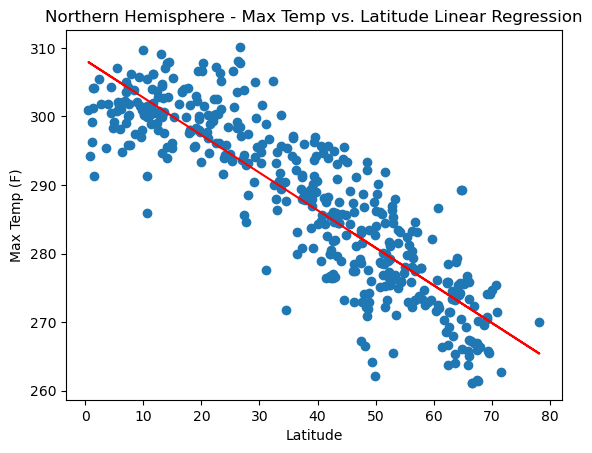

In [18]:
# Linear regression on Northern Hemisphere
# Call the function for linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (F)", (0, 0))


The r-value is: 0.6033814440862598


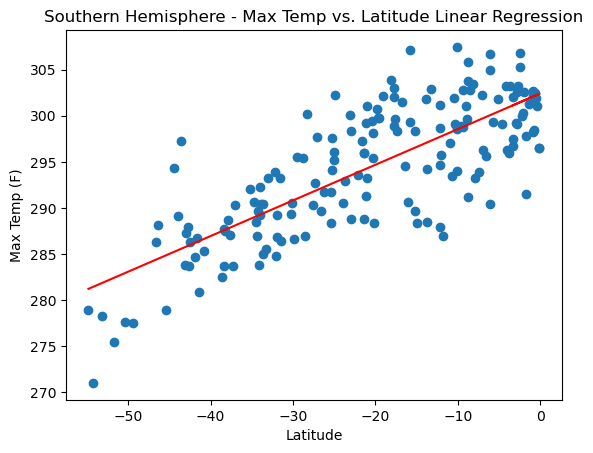

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (F)", (-50, 80))

**Discussion about the linear relationship:** For Norhern Hemisphere, the negative slope of the regression line indicates that as latitude increases, the maximum temperature tends to decrease. Temperatures tend to be colder at higher latitudes. Compared to the Southern Hemisphere, the positive slope of the regression line indicates that as latitude increases, the maximum temperature tends to increase and be warmer closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.030496195784326295


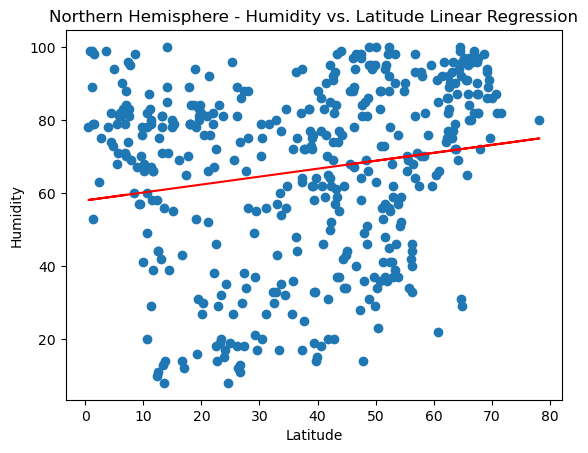

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity", (0, 0))

The r-value is: 0.04193850252045163


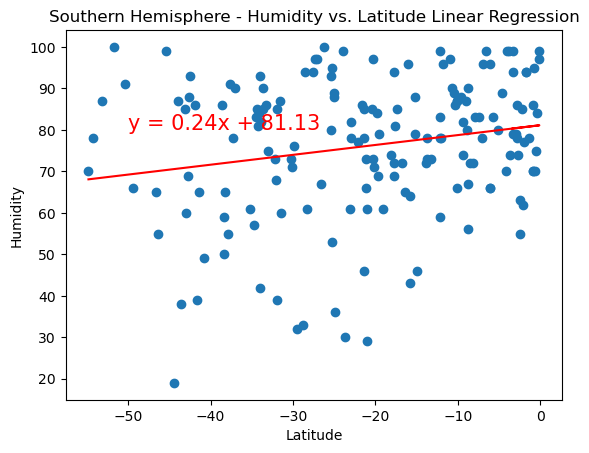

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity", (-50, 80))

**Discussion about the linear relationship:** For the North, the slope of the regression line indicates the rate of change of humidity as latitude increases. A positive slope suggests that as you move away from the equator, humidity tends to increase. Conversely, a negative slope suggests that humidity decreases as latitude increases. For the South, a positive slope suggests that as you move towards the equator, humidity tends to increase. Conversely, a negative slope suggests that humidity decreases as latitude decreases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.025221774915442044


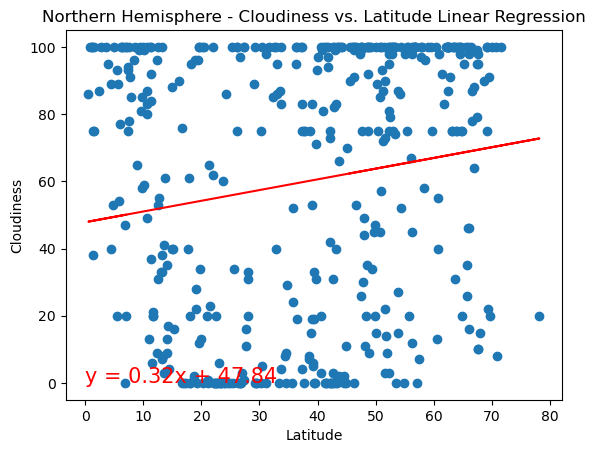

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness", (0, 0))

The r-value is: 0.004256848212792601


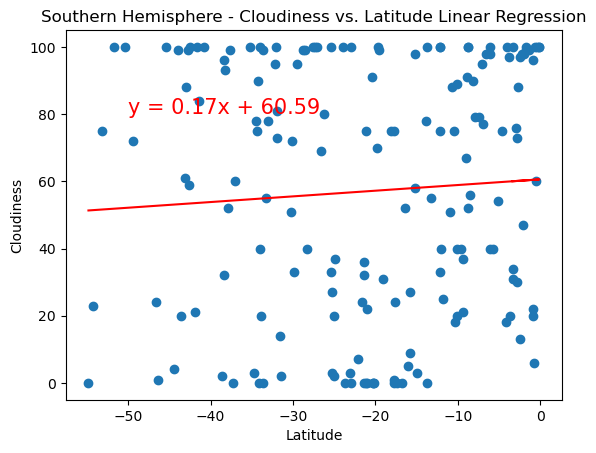

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness", (-50, 80))

**Discussion about the linear relationship:** For the North, The slope indicates the rate of change of cloudiness as latitude increases. A positive slope suggests that as you move away from the equator, cloudiness tends to increase. A negative slope suggests that cloudiness decreases as latitude increases. For the South, similarly, the slope indicates the rate of change of cloudiness as latitude decreases. A positive slope suggests that as you move towards the equator, cloudiness tends to increase. Conversely, a negative slope suggests that cloudiness decreases as latitude decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0005070066079125836


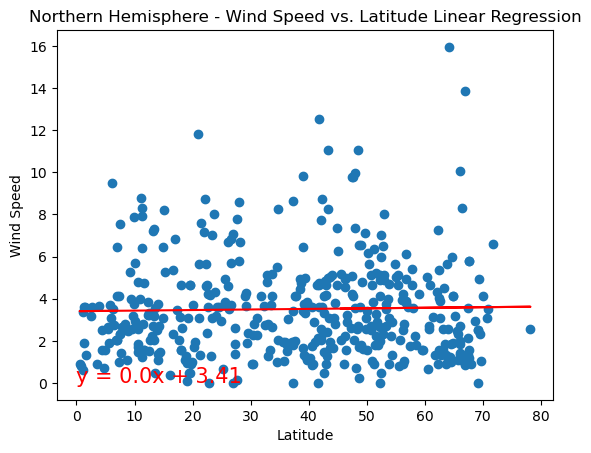

In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed", (0, 0))

The r-value is: 0.0802808532564746


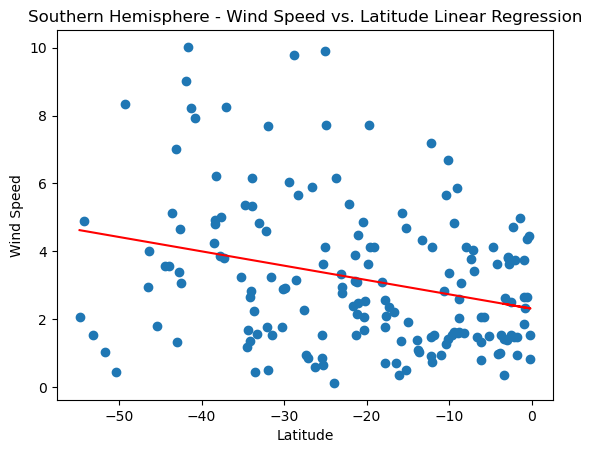

In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed", (-50, 80))

**Discussion about the linear relationship:** For the North, the slope indicates the rate of change of wind speed as latitude increases. A positive slope suggests that as you move away from the equator, wind speed tends to increase. Conversely, a negative slope suggests that wind speed decreases as latitude increases. For the South the slope indicates the rate of change of wind speed as latitude decreases. A positive slope suggests that as you move towards the equator, wind speed tends to increase. Conversely, a negative slope suggests that wind speed decreases as latitude decreases.
